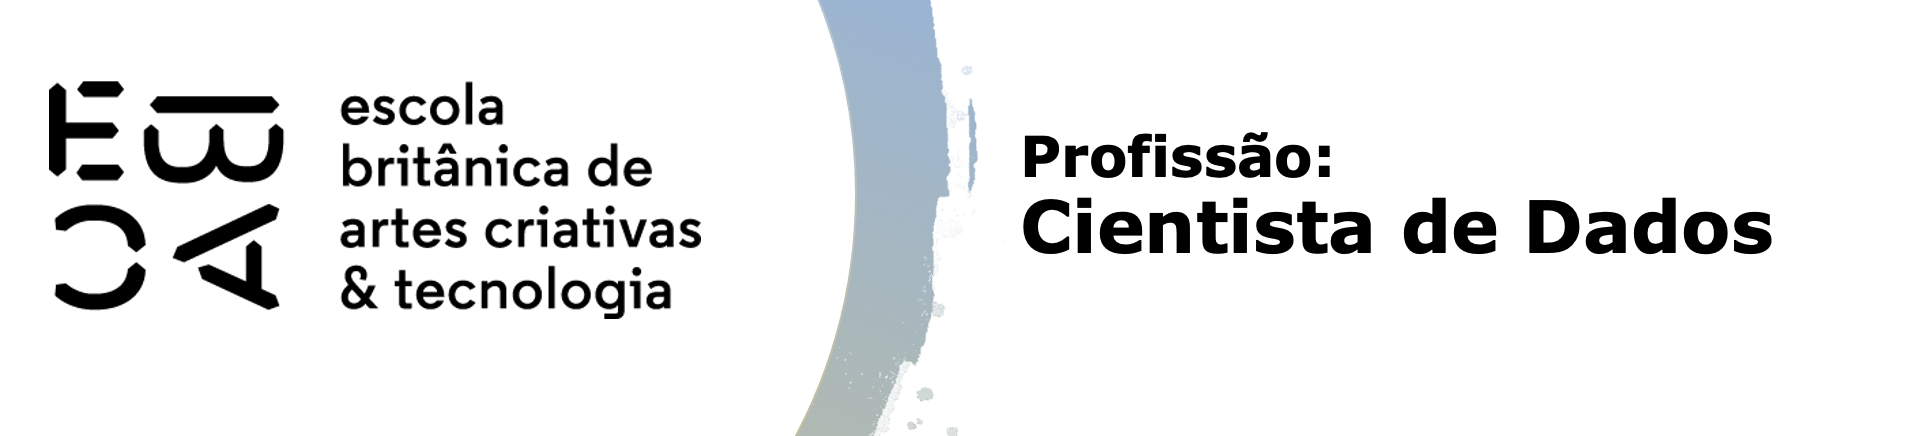

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV


In [3]:
#carregando as bases de dados
X_train = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/train/df_x_train.csv')
X_test = pd.read_csv('UCI HAR Dataset/UCI HAR Dataset/test/df_x_test.csv')
Y_train = pd.read_csv("UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", header= None)[0]
Y_test = pd.read_csv("UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", header= None)[0]
#Carregando os nomes das variáveis
features = pd.read_csv("./UCI HAR Dataset/UCI HAR Dataset/features.txt",  header= None, sep=' ' , usecols=[1])[1]

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [4]:
%%time
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20)
caminho = clf.cost_complexity_pruning_path(X_train[['tGravityAcc-energy()-X','fBodyAcc-mad()-X','angle(Y,gravityMean)']], Y_train,)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
#garantindo que os ccp_alphas são únicos e positivos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
#criando dicionário com ccp_alpas para usar no gridSearch
grid_parametros = {'ccp_alpha':ccp_alphas}

CPU times: total: 0 ns
Wall time: 47.9 ms


### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [5]:
#Reduzindo o número de ccp_alphas, lendo 1 a cada k(10)
k=10
grid_parametros_slice = {'ccp_alpha':[]}
grid_parametros_slice ['ccp_alpha'] = grid_parametros['ccp_alpha'][::k]
grid_parametros_slice 

{'ccp_alpha': array([0.00000000e+00, 1.82436050e-05, 4.81847368e-05, 1.43841650e-04,
        1.88245495e-04, 3.49555233e-04, 5.19494864e-04, 7.80374900e-04,
        1.20133204e-03, 2.40743372e-03, 7.14303075e-03])}

In [6]:
%%time
grid = GridSearchCV(estimator = clf, param_grid = grid_parametros_slice ,cv=k, verbose=100)#verbose para vizualizar o output
grid.fit(X_train[['tGravityAcc-energy()-X','fBodyAcc-mad()-X','angle(Y,gravityMean)']].values, Y_train)

Fitting 10 folds for each of 11 candidates, totalling 110 fits
[CV 1/10; 1/11] START ccp_alpha=0.0.............................................
[CV 1/10; 1/11] END ..............ccp_alpha=0.0;, score=0.720 total time=   0.0s
[CV 2/10; 1/11] START ccp_alpha=0.0.............................................
[CV 2/10; 1/11] END ..............ccp_alpha=0.0;, score=0.773 total time=   0.0s
[CV 3/10; 1/11] START ccp_alpha=0.0.............................................
[CV 3/10; 1/11] END ..............ccp_alpha=0.0;, score=0.827 total time=   0.0s
[CV 4/10; 1/11] START ccp_alpha=0.0.............................................
[CV 4/10; 1/11] END ..............ccp_alpha=0.0;, score=0.727 total time=   0.0s
[CV 5/10; 1/11] START ccp_alpha=0.0.............................................
[CV 5/10; 1/11] END ..............ccp_alpha=0.0;, score=0.800 total time=   0.0s
[CV 6/10; 1/11] START ccp_alpha=0.0.............................................
[CV 6/10; 1/11] END ..............ccp_alpha=0.

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.82436050e-05, 4.81847368e-05, 1.43841650e-04,
       1.88245495e-04, 3.49555233e-04, 5.19494864e-04, 7.80374900e-04,
       1.20133204e-03, 2.40743372e-03, 7.14303075e-03])},
             verbose=100)

In [7]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016237,0.007136,0.001671,0.003014,0.0,{'ccp_alpha': 0.0},0.720109,0.773098,0.827211,0.726531,0.8,0.783673,0.8,0.711565,0.843537,0.745578,0.773130,0.043554,7
1,0.016980,0.003899,0.000158,0.000336,0.000018,{'ccp_alpha': 1.824360502271252e-05},0.720109,0.773098,0.827211,0.726531,0.8,0.783673,0.8,0.711565,0.843537,0.745578,0.773130,0.043554,7
2,0.016378,0.002134,0.000103,0.000310,0.000048,{'ccp_alpha': 4.81847367565188e-05},0.720109,0.773098,0.827211,0.726531,0.8,0.783673,0.8,0.711565,0.843537,0.745578,0.773130,0.043554,7
3,0.018120,0.007203,0.000911,0.001635,0.000144,{'ccp_alpha': 0.00014384164982641644},0.716033,0.773098,0.827211,0.726531,0.8,0.786395,0.8,0.710204,0.843537,0.745578,0.772859,0.044330,10
4,0.019811,0.005248,0.001766,0.004634,0.000188,{'ccp_alpha': 0.000188245495361735},0.733696,0.773098,0.825850,0.726531,0.8,0.786395,0.8,0.710204,0.843537,0.745578,0.774489,0.042170,6


In [8]:
# ccp_alpha da melhor árvore
grid.best_params_

{'ccp_alpha': 0.00714303074765061}

In [9]:
# acurácia da melhor árvore
grid.best_score_

0.8105201863354037

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [10]:
#treinando a arvore com o melhor ccp_alpha
melhor_ccp = grid.best_params_['ccp_alpha']
melhor_arvore = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train[['tGravityAcc-energy()-X','fBodyAcc-mad()-X','angle(Y,gravityMean)']], Y_train)


Acurácia: 73.09


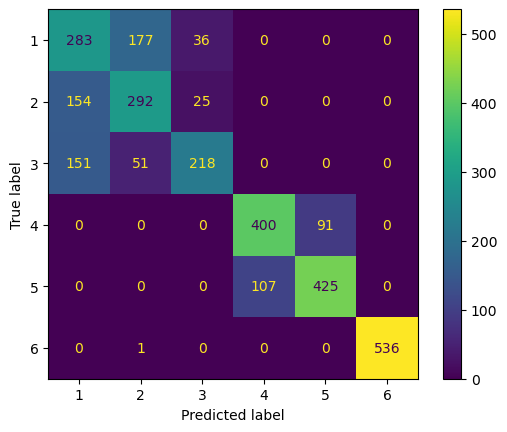

In [11]:
#Calculando a acurácia da melhor árvore na base de teste
acuracia_teste = melhor_arvore.score(X_test[['tGravityAcc-energy()-X','fBodyAcc-mad()-X','angle(Y,gravityMean)']], Y_test)
print(f'Acurácia: {acuracia_teste*100:.2f}')
#Plotando a matriz confusão
ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_test[['tGravityAcc-energy()-X','fBodyAcc-mad()-X','angle(Y,gravityMean)']], Y_test);


### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [12]:
#Conforme visto na matriz confusão, a classe mais difícil de prever pelo modelo criado é a classe 1-caminhada
#Criando uma nova variável binária para identificar se é caminhada (0: não, 1: sim) usando a base de treino
caminhada_train = pd.Series(np.where(Y_train == 1 , 1, 0))
#Treinando uma árvore para prever se é ou não caminhada
clf_2 = DecisionTreeClassifier(random_state=2360873, max_depth = 4, min_samples_leaf = 20).fit(X_train, caminhada_train)

In [13]:
#Verificando as variáveis mais importantes
df_feature_importances = pd.DataFrame(clf_2.feature_importances_, index = X_train.columns, columns = ['importances'])
df_feature_importances = (df_feature_importances.query('importances != 0')
                          .sort_values(by = 'importances',ascending = False)
)

df_feature_importances

,importances
tBodyGyroJerk-mad()-X,0.352154
fBodyAccMag-std(),0.350738
"tGravityAcc-arCoeff()-X,1",0.113027
tBodyAccMag-arCoeff()1,0.036619
fBodyGyro-maxInds-X,0.030157
"tBodyAcc-correlation()-X,Y",0.028273
tBodyGyroMag-entropy(),0.025598
tBodyAccJerk-entropy()-Z,0.023826
"tBodyAccJerk-correlation()-X,Y",0.016503
"tGravityAcc-arCoeff()-X,2",0.014936


In [14]:
#3 variáveis mais importantes
var_importantes = df_feature_importances.index[0:3].values
var_importantes

array(['tBodyGyroJerk-mad()-X', 'fBodyAccMag-std()',
       'tGravityAcc-arCoeff()-X,1'], dtype=object)

In [15]:
%%time
#Calculando os ccp_alphas para uma árvore com as 3 variaveis mais importantes para identificar se é caminhada
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20)
caminho = clf.cost_complexity_pruning_path(X_train[var_importantes], Y_train,)# considerando somente as 3 variáveis mais importantes
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities
#garantindo que os ccp_alphas são únicos e positivos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
#criando dicionário com ccp_alpas para usar no gridSearch
grid_parametros = {'ccp_alpha':ccp_alphas}

CPU times: total: 31.2 ms
Wall time: 34.4 ms


In [16]:
#Reduzindo o número de ccp_alphas, lendo 1 a cada k(10)
k=10
grid_parametros_slice = {'ccp_alpha':[]}
grid_parametros_slice ['ccp_alpha'] = grid_parametros['ccp_alpha'][::k]
grid_parametros_slice 

{'ccp_alpha': array([0.00000000e+00, 3.85864994e-05, 5.61706307e-05, 8.03739242e-05,
        1.01392237e-04, 1.24110162e-04, 1.40867276e-04, 1.65703243e-04,
        2.20592077e-04, 2.53476221e-04, 2.78967688e-04, 3.27579434e-04,
        3.80939323e-04, 4.68901097e-04, 7.14683082e-04, 9.32502107e-04,
        1.23200824e-03, 2.63910999e-03, 1.49413258e-02])}

In [17]:
#Grid Search
grid = GridSearchCV(estimator = clf, param_grid = grid_parametros_slice ,cv=10, verbose=100)#verbose para vizualizar o output
grid.fit(X_train[var_importantes], Y_train) 

Fitting 10 folds for each of 19 candidates, totalling 190 fits
[CV 1/10; 1/19] START ccp_alpha=0.0.............................................
[CV 1/10; 1/19] END ..............ccp_alpha=0.0;, score=0.594 total time=   0.0s
[CV 2/10; 1/19] START ccp_alpha=0.0.............................................
[CV 2/10; 1/19] END ..............ccp_alpha=0.0;, score=0.615 total time=   0.0s
[CV 3/10; 1/19] START ccp_alpha=0.0.............................................
[CV 3/10; 1/19] END ..............ccp_alpha=0.0;, score=0.605 total time=   0.0s
[CV 4/10; 1/19] START ccp_alpha=0.0.............................................
[CV 4/10; 1/19] END ..............ccp_alpha=0.0;, score=0.620 total time=   0.0s
[CV 5/10; 1/19] START ccp_alpha=0.0.............................................
[CV 5/10; 1/19] END ..............ccp_alpha=0.0;, score=0.633 total time=   0.0s
[CV 6/10; 1/19] START ccp_alpha=0.0.............................................
[CV 6/10; 1/19] END ..............ccp_alpha=0.

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 3.85864994e-05, 5.61706307e-05, 8.03739242e-05,
       1.01392237e-04, 1.24110162e-04, 1.40867276e-04, 1.65703243e-04,
       2.20592077e-04, 2.53476221e-04, 2.78967688e-04, 3.27579434e-04,
       3.80939323e-04, 4.68901097e-04, 7.14683082e-04, 9.32502107e-04,
       1.23200824e-03, 2.63910999e-03, 1.49413258e-02])},
             verbose=100)

In [18]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030626,0.023013,0.002644,0.003881,0.0,{'ccp_alpha': 0.0},0.593750,0.615489,0.605442,0.620408,0.632653,0.659864,0.738776,0.730612,0.691156,0.631293,0.651944,0.04899,16
1,0.018580,0.006213,0.000954,0.002231,0.000039,{'ccp_alpha': 3.858649935560522e-05},0.593750,0.615489,0.605442,0.620408,0.632653,0.659864,0.738776,0.730612,0.691156,0.631293,0.651944,0.04899,16
2,0.024478,0.008304,0.000750,0.000880,0.000056,{'ccp_alpha': 5.61706307009456e-05},0.595109,0.615489,0.605442,0.620408,0.632653,0.659864,0.738776,0.730612,0.691156,0.631293,0.652080,0.04883,15
3,0.019422,0.007876,0.001763,0.004637,0.00008,{'ccp_alpha': 8.037392422593787e-05},0.592391,0.615489,0.606803,0.623129,0.632653,0.661224,0.738776,0.730612,0.691156,0.631293,0.652353,0.04888,13
4,0.020835,0.006039,0.000100,0.000301,0.000101,{'ccp_alpha': 0.00010139223662902546},0.592391,0.615489,0.606803,0.623129,0.632653,0.661224,0.738776,0.730612,0.691156,0.631293,0.652353,0.04888,13


In [19]:
# ccp_alpha da melhor árvore
grid.best_params_

{'ccp_alpha': 0.0007146830817351749}

In [20]:
# acurácia da melhor árvore
grid.best_score_

0.6659555235137533

In [21]:
#treinando a arvore com o melhor ccp_alpha
melhor_ccp = grid.best_params_['ccp_alpha']
melhor_arvore = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train[var_importantes], Y_train)

Acurácia: 68.71


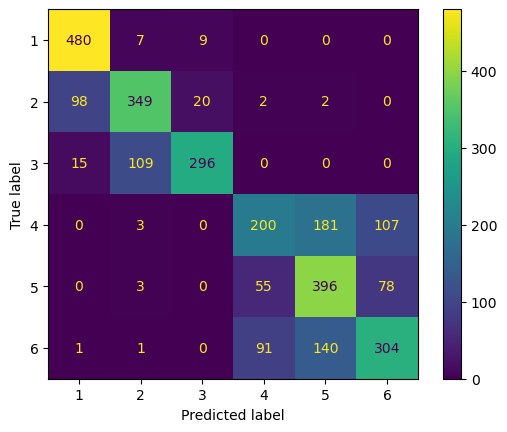

In [22]:
#Calculando a acurácia da melhor árvore na base de teste
acuracia_teste = melhor_arvore.score(X_test[var_importantes], Y_test)
print(f'Acurácia: {acuracia_teste*100:.2f}')
#Plotando a matriz confusão
ConfusionMatrixDisplay.from_estimator(melhor_arvore, X_test[var_importantes], Y_test);

Embora a acurácia geral tenha caido em relação ao modelo anterior, o novo modelo ficou muito melhor para prever a atividade 1 caminhada, devido a mudança das 3 variáveis consideradas no modelo